# 0. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

!pip install xlrd

import xlrd

!pip install openpyxl

import openpyxl

from datetime import datetime

import warnings
warnings.simplefilter("ignore")

plt.rc('font',family='D2Coding')

You should consider upgrading via the 'c:\users\ehman\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\ehman\anaconda3\python.exe -m pip install --upgrade pip' command.


# 1. 데이터수집

In [2]:
park1 = pd.read_excel('Data/주요관광지점 입장객(2004.07 이후)_221219010031.xls',header=[1])
park2 = pd.read_excel('Data/주요관광지점 입장객(2004.07 이후)_221219010051.xls',header=[1])
park3 = pd.read_excel('Data/주요관광지점 입장객(2004.07 이후)_221219010102.xls',header=[1])
park4 = pd.read_excel('Data/주요관광지점 입장객(2004.07 이후)_221219010113.xls',header=[1])

In [3]:
park1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,인원계,2018년 01월,2018년 02월,2018년 03월,2018년 04월,...,인원계.4,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월
0,서울특별시,송파구,롯데월드,내국인,15499038,5692646,508452,536389,365255,417187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,송파구,롯데월드,합계,15499038,5692646,508452,536389,365255,417187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
park2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,인원계,2018년 01월,2018년 02월,2018년 03월,2018년 04월,...,인원계.4,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월
0,경기도,용인시,에버랜드,내국인,21317498,5315214,170487,202014,349307,576530,...,3926199,183139,191591,223328,660349,712637,441690,435811,443440,634214
1,경기도,용인시,에버랜드,외국인,1865124,829882,30673,38369,63904,103923,...,45149,629,553,600,1806,4190,6177,7488,8138,15568
2,경기도,용인시,에버랜드,합계,23182622,6145096,201160,240383,413211,680453,...,3971348,183768,192144,223928,662155,716827,447867,443299,451578,649782


In [5]:
park3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,인원계,2018년 01월,2018년 02월,2018년 03월,2018년 04월,...,인원계.4,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월
0,경기도,과천시,서울랜드,내국인,5157729,1137716,36275,58063,62579,155143,...,976459,101354,68155,50725,198098,234332,117347,78057,94813,33578
1,경기도,과천시,서울랜드,외국인,249577,88105,2730,4505,5001,11677,...,15148,1154,749,527,2038,3240,1999,1040,1838,2563
2,경기도,과천시,서울랜드,합계,5407306,1225821,39005,62568,67580,166820,...,991607,102508,68904,51252,200136,237572,119346,79097,96651,36141


In [6]:
park4

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,인원계,2018년 01월,2018년 02월,2018년 03월,2018년 04월,...,인원계.4,2022년 01월,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월
0,경기도,과천시,서울대공원,내국인,7809556,2142108,36270,42051,152119,279615,...,1172577,26708,37976,89866,257461,304586,150657,50544,81915,172864
1,경기도,과천시,서울대공원,외국인,43457,17470,321,766,1138,1940,...,2802,98,69,136,406,609,371,277,263,573
2,경기도,과천시,서울대공원,합계,7853013,2159578,36591,42817,153257,281555,...,1175379,26806,38045,90002,257867,305195,151028,50821,82178,173437


일단 양식은 모두 동일합니다.

# 2. 데이터 전처리

년월이 가로로 펼쳐져있는데, 세로로 변경해야겠습니다.  

그리고 내국인과 외국인 구분은 롯데월드에 외국인 통계가 없어서 모두 동일하게 내국인만 사용하겠습니다.

## 1) 일단 합칩니다.

In [7]:
tmp=pd.concat([park1,park2,park3,park4])

## 2) 내국인만 남깁니다.

In [8]:
tmp=tmp[tmp.iloc[:,3]=='내국인']

지역과 내/외국인 구분, 연도별 "인원계"는 제거합니다.

## 3) 불필요한 컬럼은 지웁니다.

In [9]:
tmp.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       '인원계', '2018년 01월', '2018년 02월', '2018년 03월', '2018년 04월', '2018년 05월',
       '2018년 06월', '2018년 07월', '2018년 08월', '2018년 09월', '2018년 10월',
       '2018년 11월', '2018년 12월', '인원계.1', '2019년 01월', '2019년 02월',
       '2019년 03월', '2019년 04월', '2019년 05월', '2019년 06월', '2019년 07월',
       '2019년 08월', '2019년 09월', '2019년 10월', '2019년 11월', '2019년 12월',
       '인원계.2', '2020년 01월', '2020년 02월', '2020년 03월', '2020년 04월',
       '2020년 05월', '2020년 06월', '2020년 07월', '2020년 08월', '2020년 09월',
       '2020년 10월', '2020년 11월', '2020년 12월', '인원계.3', '2021년 01월',
       '2021년 02월', '2021년 03월', '2021년 04월', '2021년 05월', '2021년 06월',
       '2021년 07월', '2021년 08월', '2021년 09월', '2021년 10월', '2021년 11월',
       '2021년 12월', '인원계.4', '2022년 01월', '2022년 02월', '2022년 03월',
       '2022년 04월', '2022년 05월', '2022년 06월', '2022년 07월', '2022년 08월',
       '2022년 09월'],
      dtype='object')

In [10]:
tmp.drop(['Unnamed: 0', 'Unnamed: 1','Unnamed: 3', 'Unnamed: 4',
       '인원계', '인원계.1','인원계.2', '인원계.3','인원계.4'],axis=1,inplace=True)

## 4) 행과 열을 전치합니다. (행을 열로, 열을 행으로)

In [11]:
tmp=tmp.transpose()

tmp.columns=tmp.iloc[0].tolist()

tmp.drop('Unnamed: 2',inplace=True)

In [12]:
tmp.head()

,롯데월드,에버랜드,서울랜드,서울대공원
2018년 01월,508452,170487,36275,36270
2018년 02월,536389,202014,58063,42051
2018년 03월,365255,349307,62579,152119
2018년 04월,417187,576530,155143,279615
2018년 05월,479165,751468,192666,456680


In [13]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 2018년 01월 to 2022년 09월
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   롯데월드    48 non-null     object
 1   에버랜드    57 non-null     object
 2   서울랜드    57 non-null     object
 3   서울대공원   57 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


결측치와 문자열이 있어서 변경이 필요합니다.

- 결측치 확인

In [14]:
tmp.isna().sum()

롯데월드     9
에버랜드     0
서울랜드     0
서울대공원    0
dtype: int64

In [15]:
tmp.tail(10)

,롯데월드,에버랜드,서울랜드,서울대공원
2021년 12월,312796,253730,30051,34721
2022년 01월,NaN,183139,101354,26708
2022년 02월,NaN,191591,68155,37976
2022년 03월,NaN,223328,50725,89866
2022년 04월,NaN,660349,198098,257461
2022년 05월,NaN,712637,234332,304586
2022년 06월,NaN,441690,117347,150657
2022년 07월,NaN,435811,78057,50544
2022년 08월,NaN,443440,94813,81915
2022년 09월,NaN,634214,33578,172864


- 결측치를 평균값으로 대체

In [16]:
tmp.fillna(tmp['롯데월드'][:-9].mean(),inplace=True)

In [17]:
tmp['에버랜드']=tmp['에버랜드'].apply(lambda x: (int)(x))
tmp['서울랜드']=tmp['서울랜드'].apply(lambda x: (int)(x))
tmp['서울대공원']=tmp['서울대공원'].apply(lambda x: (int)(x))
tmp['롯데월드']=tmp['롯데월드'].apply(lambda x: (int)(x))

In [18]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 2018년 01월 to 2022년 09월
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   롯데월드    57 non-null     int64
 1   에버랜드    57 non-null     int64
 2   서울랜드    57 non-null     int64
 3   서울대공원   57 non-null     int64
dtypes: int64(4)
memory usage: 2.2+ KB


# 3. 데이터 시각화

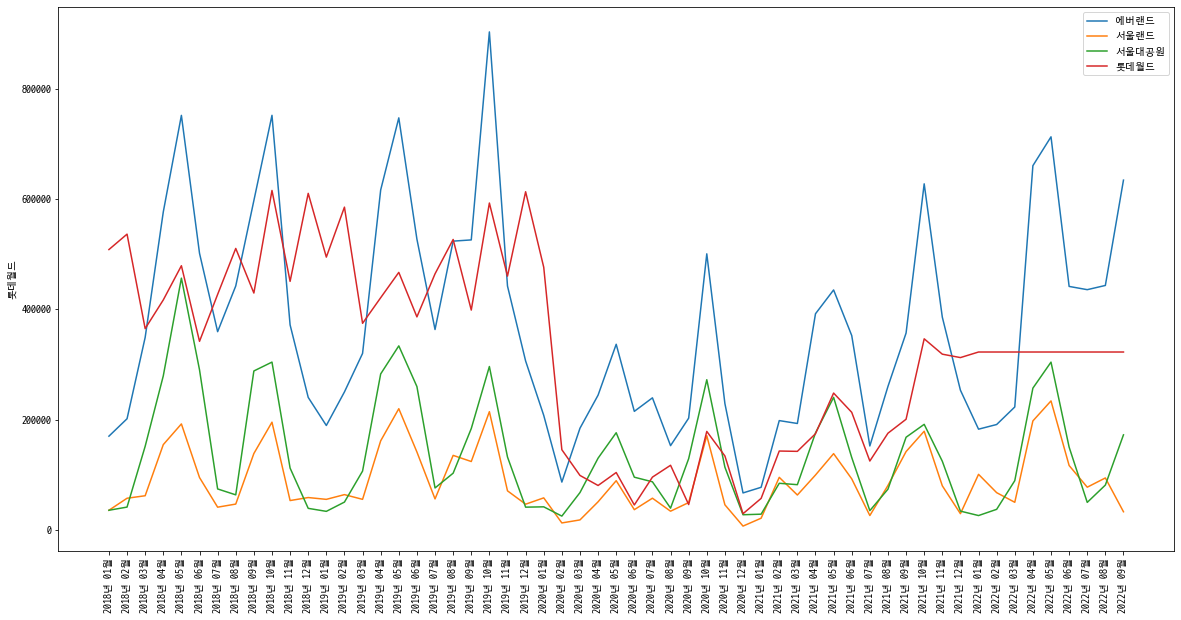

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(data=tmp,x=tmp.index,y=tmp['에버랜드'])
sns.lineplot(data=tmp,x=tmp.index,y=tmp['서울랜드'])
sns.lineplot(data=tmp,x=tmp.index,y=tmp['서울대공원'])
sns.lineplot(data=tmp,x=tmp.index,y=tmp['롯데월드'])
plt.xticks(rotation=90)
plt.legend(['에버랜드','서울랜드','서울대공원','롯데월드'])
plt.rc('font', size=18) 
plt.show()

롯데월드는 실내가 있어서 월별 편차가 작아 보이긴 합니다만, 나머지 세군데는 비슷한 패턴을 가지는 것을 볼 수 있습니다.

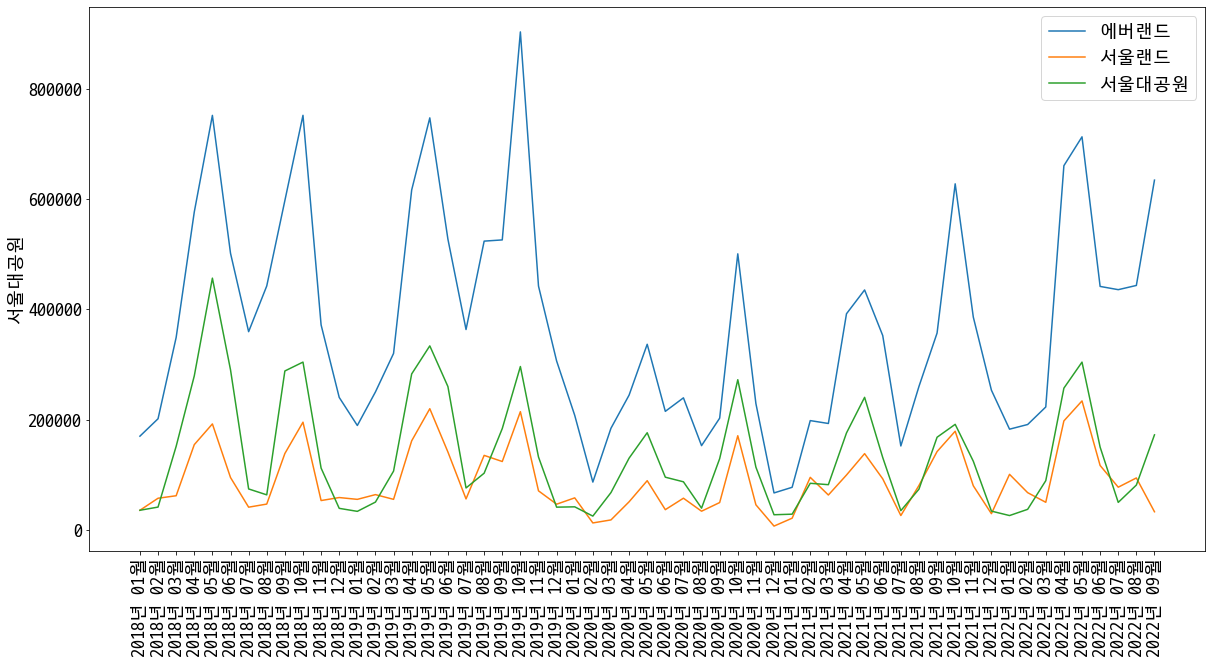

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(data=tmp,x=tmp.index,y=tmp['에버랜드'])
sns.lineplot(data=tmp,x=tmp.index,y=tmp['서울랜드'])
sns.lineplot(data=tmp,x=tmp.index,y=tmp['서울대공원'])

plt.xticks(rotation=90)
plt.legend(['에버랜드','서울랜드','서울대공원'])
plt.rc('font', size=18) 
plt.show()

정규화를 해서 다시 그려볼까요?

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

tmp[tmp.columns]=scaler.fit_transform(tmp[tmp.columns])

tmp.head()

,롯데월드,에버랜드,서울랜드,서울대공원
2018년 01월,0.817170,0.123131,0.126409,0.024539
2018년 02월,0.864890,0.160889,0.222512,0.037953
2018년 03월,0.572573,0.337296,0.242431,0.293339
2018년 04월,0.661279,0.609430,0.650713,0.589163
2018년 05월,0.767144,0.818946,0.816219,1.000000


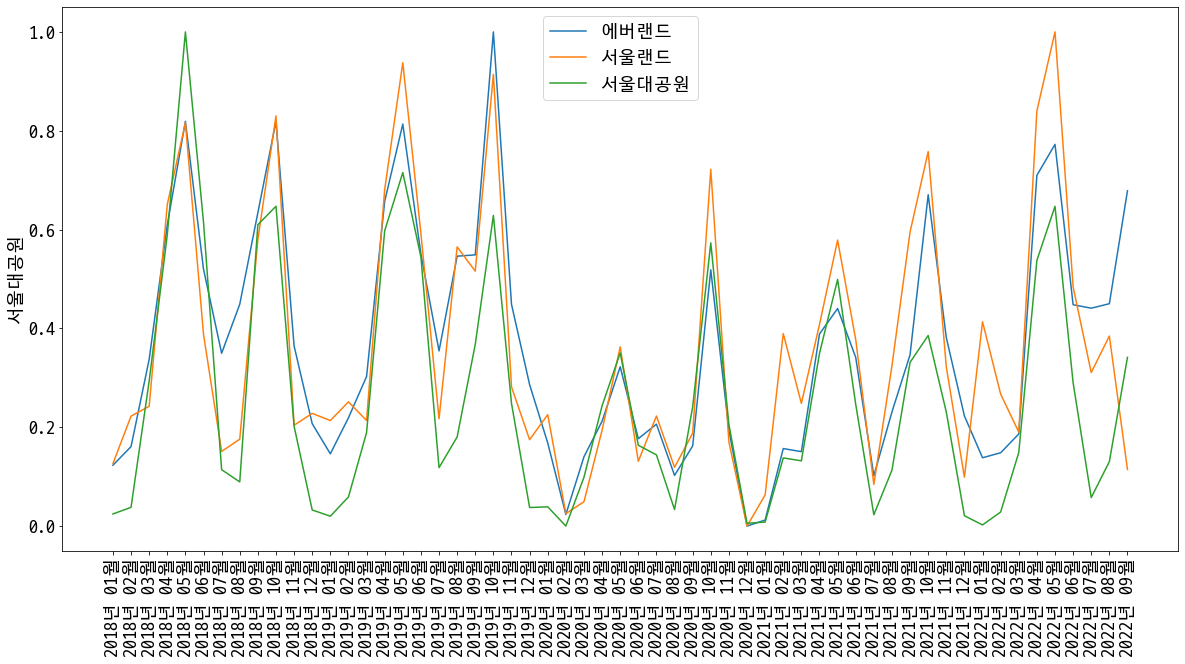

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(data=tmp,x=tmp.index,y=tmp['에버랜드'])
sns.lineplot(data=tmp,x=tmp.index,y=tmp['서울랜드'])
sns.lineplot(data=tmp,x=tmp.index,y=tmp['서울대공원'])

plt.xticks(rotation=90)
plt.legend(['에버랜드','서울랜드','서울대공원'])
plt.rc('font', size=18) 
plt.show()

차이는 있으나, 월별 추세는 많이 비슷합니다.

# 4. 유사도 측정

In [23]:
tmp.head()

,롯데월드,에버랜드,서울랜드,서울대공원
2018년 01월,0.817170,0.123131,0.126409,0.024539
2018년 02월,0.864890,0.160889,0.222512,0.037953
2018년 03월,0.572573,0.337296,0.242431,0.293339
2018년 04월,0.661279,0.609430,0.650713,0.589163
2018년 05월,0.767144,0.818946,0.816219,1.000000


In [24]:
from scipy.stats import pearsonr

print('서울랜드:'+(str)(pearsonr(tmp['서울대공원'],tmp['서울랜드'])))

print('에버랜드:'+(str)(pearsonr(tmp['서울대공원'],tmp['에버랜드'])))

print('롯데월드:'+(str)(pearsonr(tmp.iloc[:-9,2],tmp.iloc[:-9,0])))

서울랜드:(0.8432218831631356, 1.8816192750811194e-16)
에버랜드:(0.8583986974210283, 1.4095590883997428e-17)
롯데월드:(0.3664222585784019, 0.010422002130813979)


서울대공원의 일일입장객 수를 분석하면 서울랜드와 에버랜드도 어느정도 유사성을 가진다고 볼 수 있습니다.
그러나 롯데월드는 서울 접근성 및 상대적으로 날씨 영향이 적은 실내여서 차이가 있을 것으로 예상됩니다.